<a href="https://colab.research.google.com/github/Suyash-Mishra3/22BDS0192_EDA-Project/blob/colab-commit/22BDS0192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [9]:
# Dimensions
print("Dimensions:", df.shape)

# Column Names
print("\nColumn Names:\n", df.columns.tolist())

# Structure
print("\nData Types:\n", df.dtypes)

# First few rows
print("\nHead:\n", df.head())

# Last few rows
print("\nTail:\n", df.tail())

# Subset example (first 5 rows of first 3 columns)
print("\nSubset:\n", df.iloc[:5, :3])


Dimensions: (13392, 12)

Column Names:
 ['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'class']

Data Types:
 age                          int64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

Head:
    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4  

In [10]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Central Tendency
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])

# Measure of Dispersion
print("\nVariance:\n", df.var(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))

# Interquartile Range (IQR)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print("\nIQR:\n", IQR)

# Correlation (numeric only)
print("\nCorrelation:\n", df.corr(numeric_only=True))




Summary Statistics:
                  age gender     height_cm     weight_kg    body fat_%  \
count   13392.000000  13392  13392.000000  13392.000000  13392.000000   
unique           NaN      2           NaN           NaN           NaN   
top              NaN      M           NaN           NaN           NaN   
freq             NaN   8467           NaN           NaN           NaN   
mean       36.775836    NaN    168.560671     67.448686     23.239700   
std        13.625886    NaN      8.426305     11.949061      7.256821   
min        21.000000    NaN    125.000000     26.300000      3.000000   
25%        25.000000    NaN    162.400000     58.200000     18.000000   
50%        32.000000    NaN    169.200000     67.400000     22.800000   
75%        48.000000    NaN    174.800000     75.300000     28.000000   
max        64.000000    NaN    193.800000    138.100000     78.400000   

           diastolic      systolic     gripForce  sit and bend forward_cm  \
count   13392.000000  13

In [11]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)




Missing Values:
 age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Duplicate Rows: 0


/tmp/ipython-input-2614548138.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2614548138.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

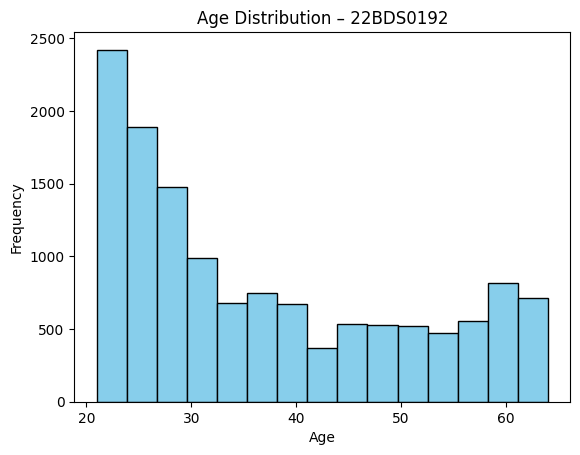

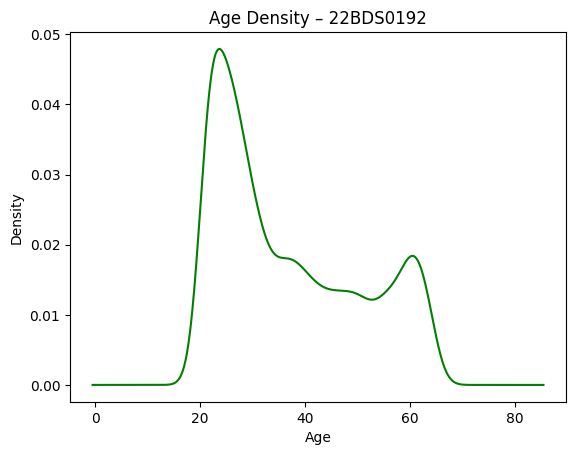

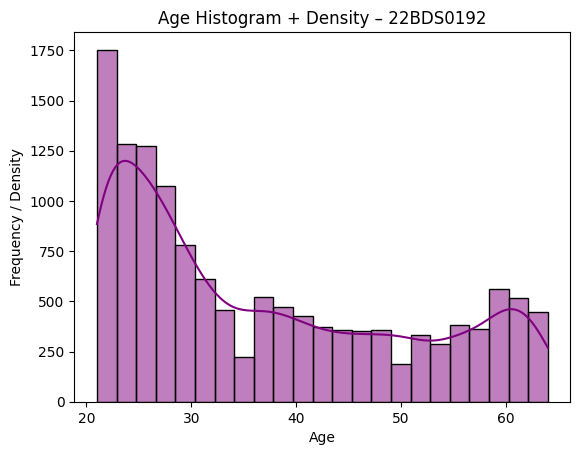

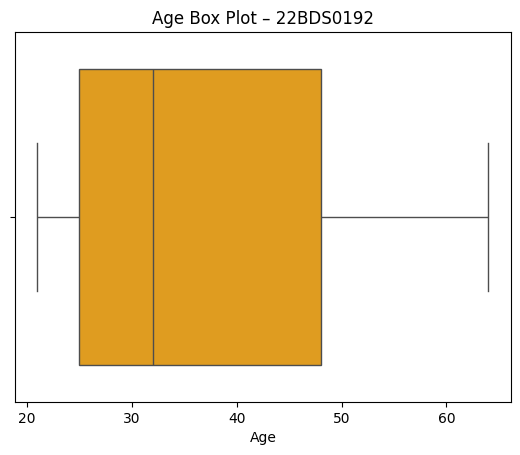

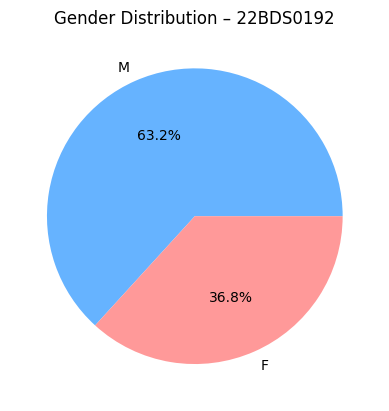

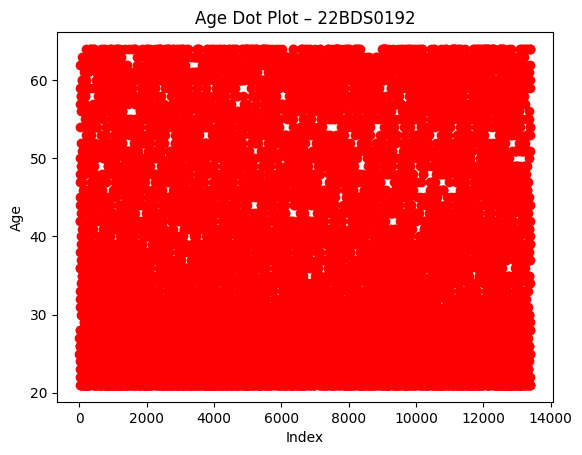

In [12]:
#Histogram
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution – 22BDS0192")
plt.show()

#Density Plot
df['age'].plot(kind='density', color='green')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Density – 22BDS0192")
plt.show()

#Histogram + Density
import seaborn as sns

sns.histplot(df['age'], kde=True, color='purple')
plt.xlabel("Age")
plt.ylabel("Frequency / Density")
plt.title("Age Histogram + Density – 22BDS0192")
plt.show()

#Box Plot
sns.boxplot(x=df['age'], color='orange')
plt.xlabel("Age")
plt.title("Age Box Plot – 22BDS0192")
plt.show()

#Pie Chart
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Gender Distribution – 22BDS0192")
plt.show()

#Dot Plot
plt.plot(df['age'], 'o', color='red')
plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Age Dot Plot – 22BDS0192")
plt.show()


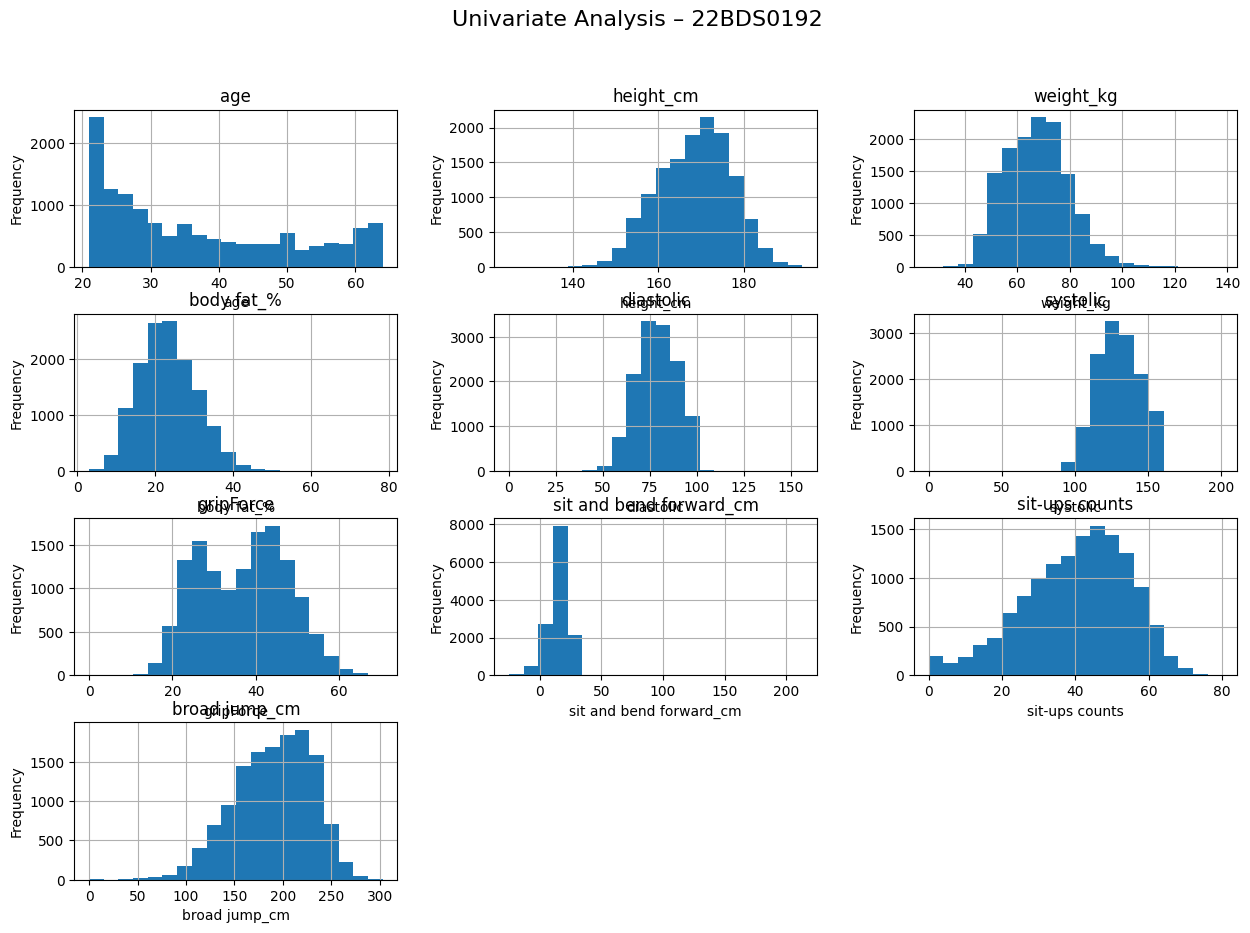

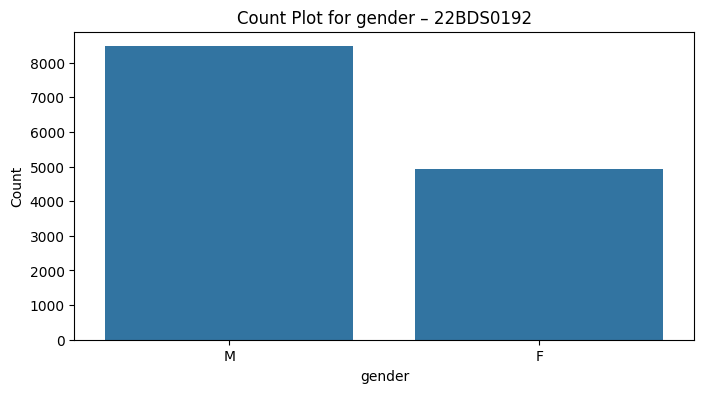

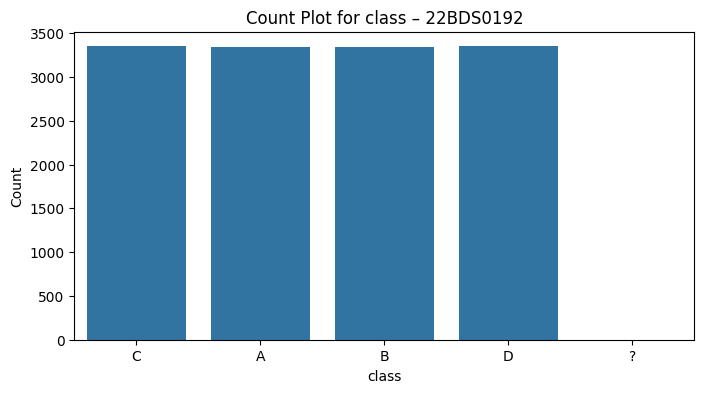

In [6]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Analysis – 22BDS0192", fontsize=16)
for ax, col in zip(plt.gcf().axes, df.select_dtypes(include='number').columns):
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

# Countplot
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count Plot for {col} – 22BDS0192")
    plt.show()



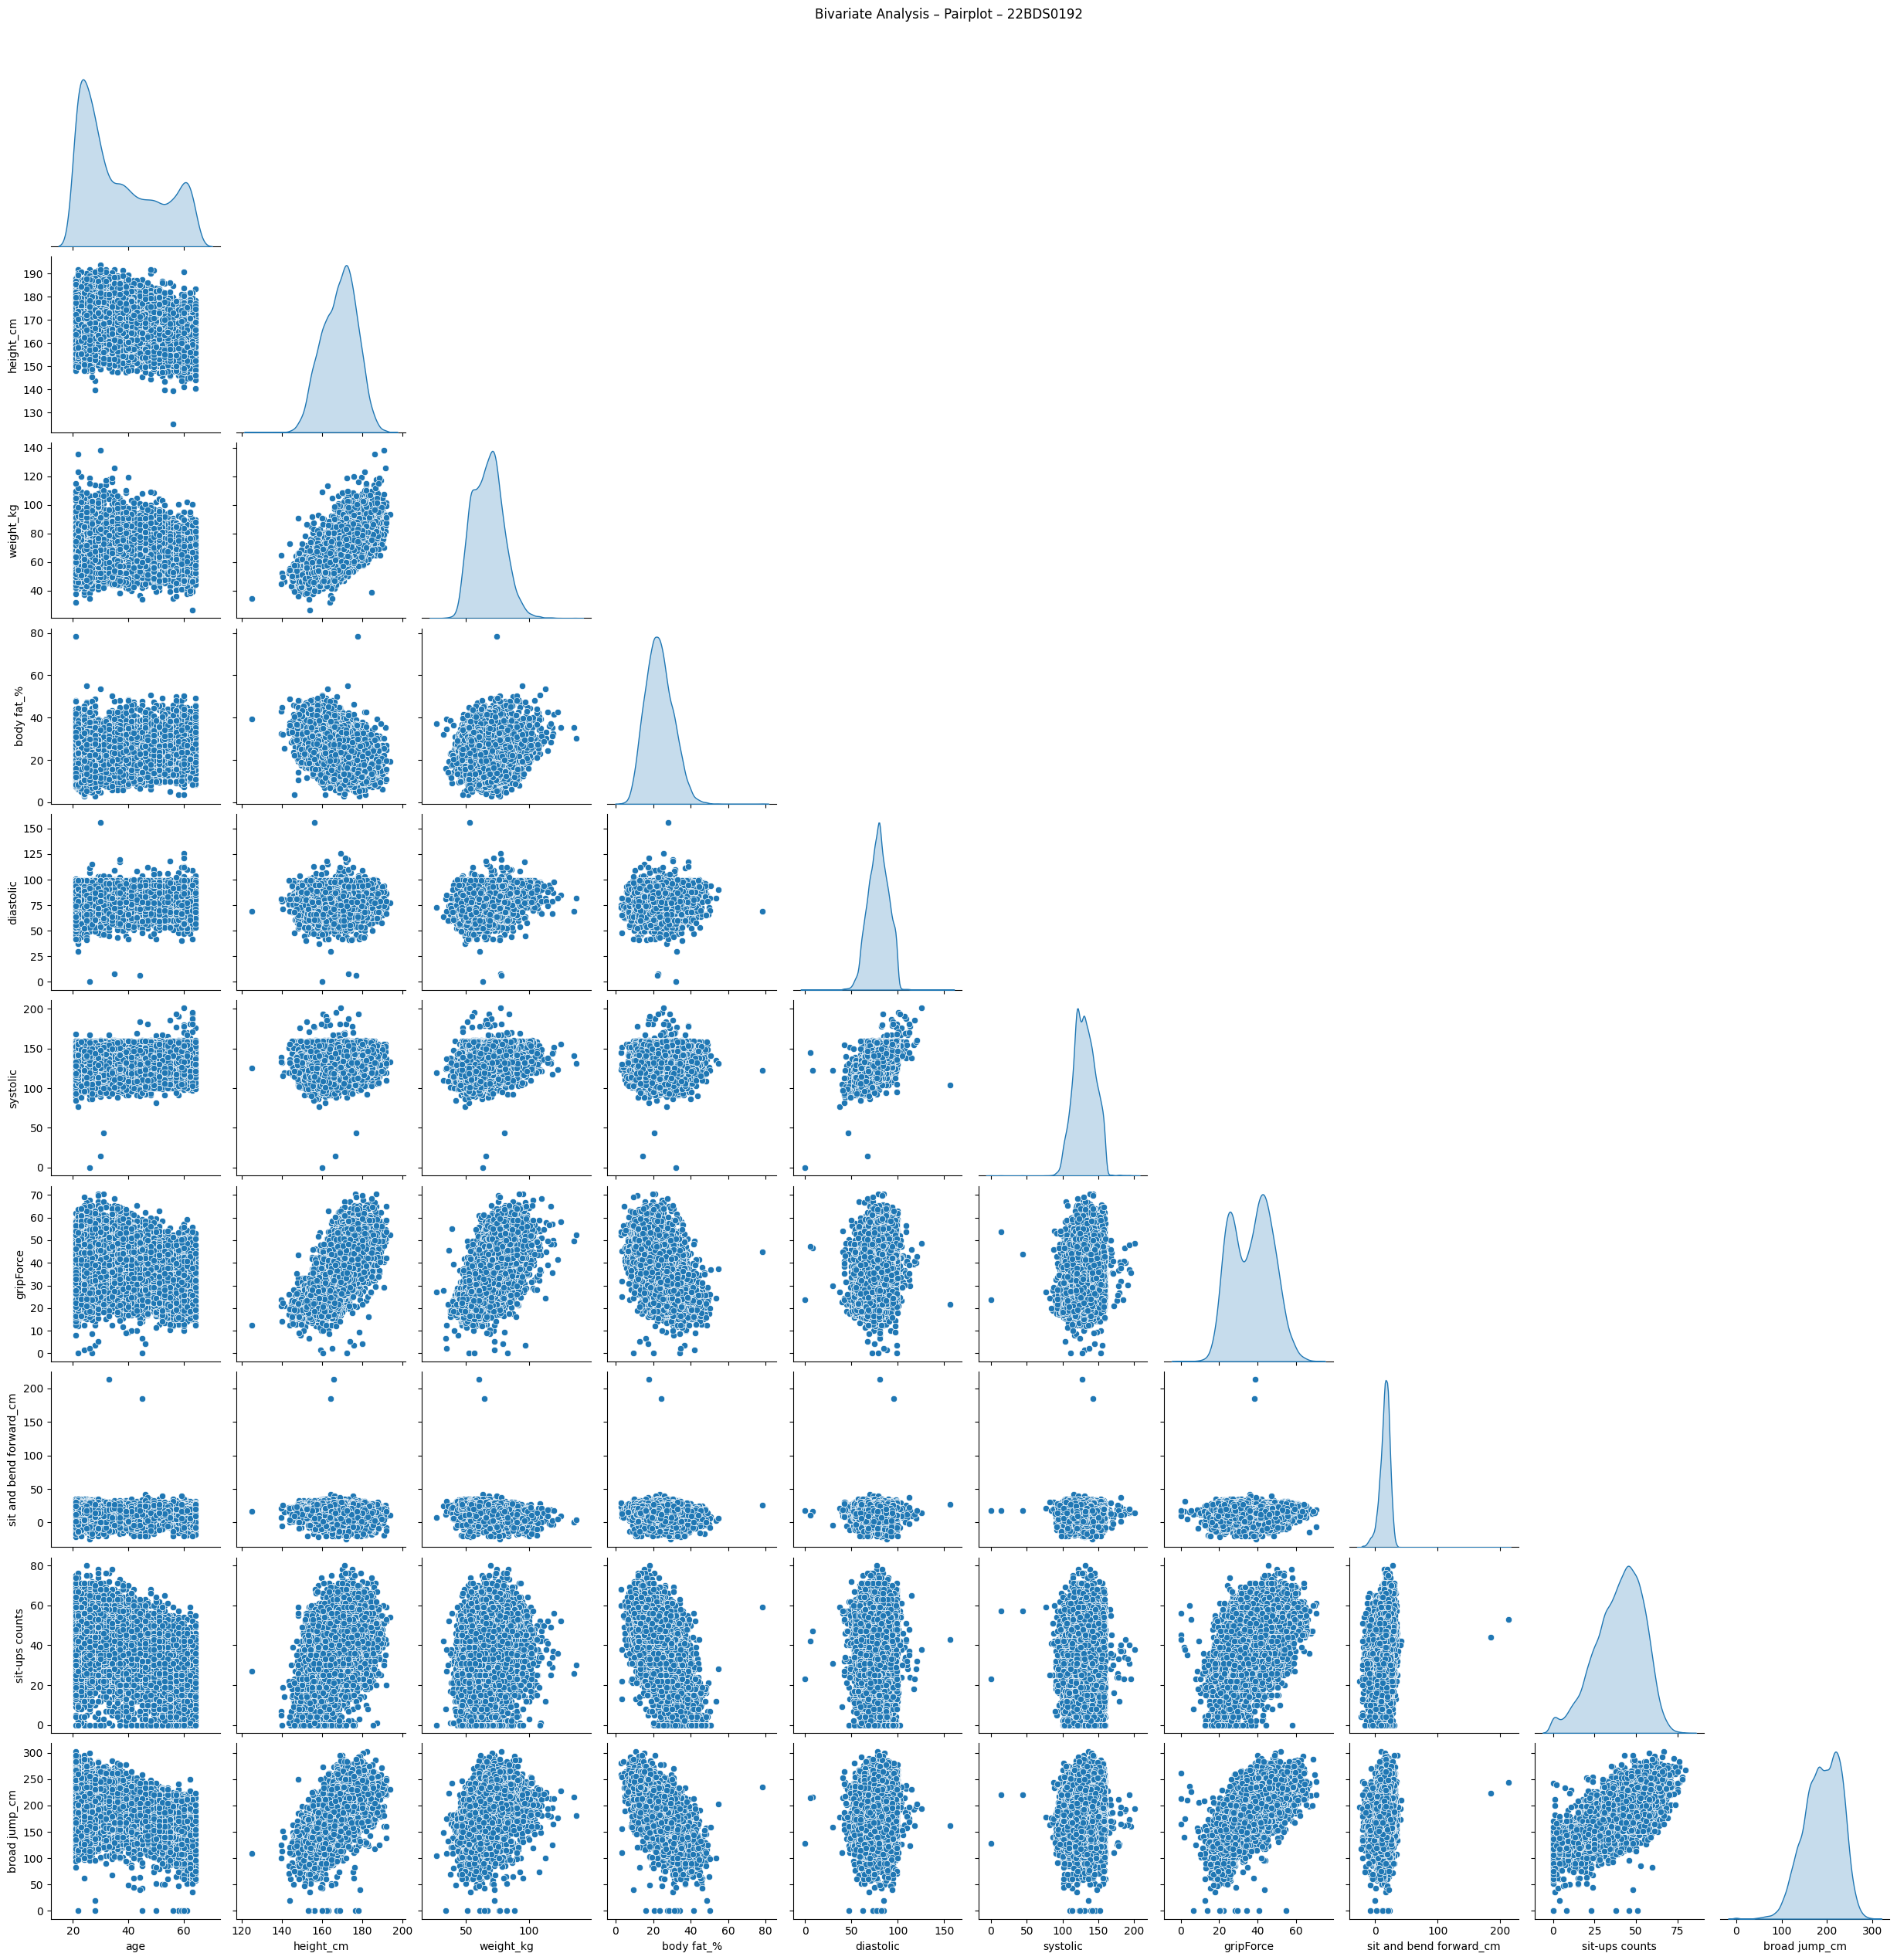

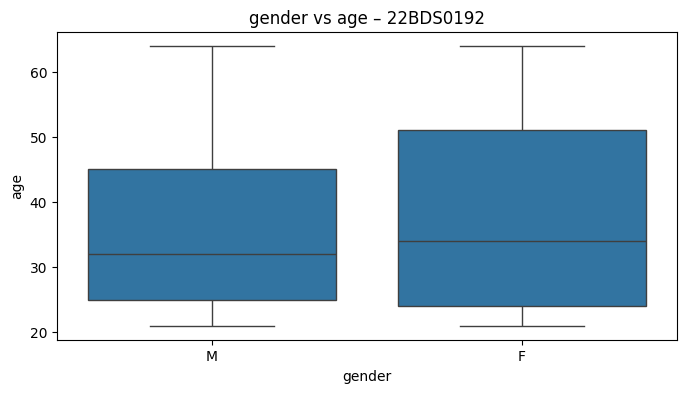

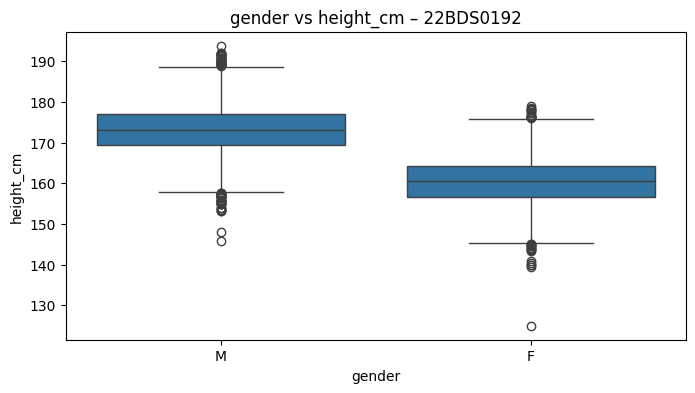

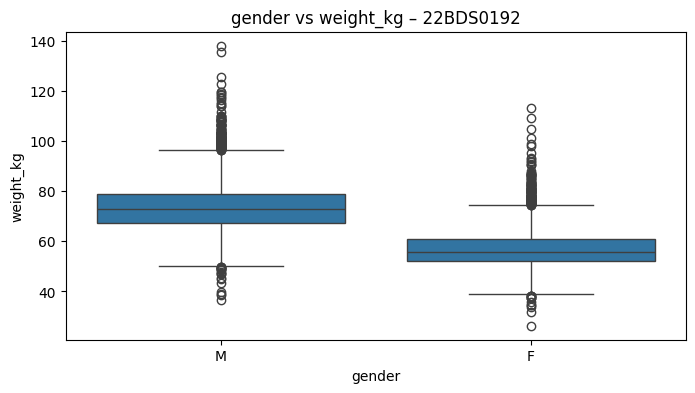

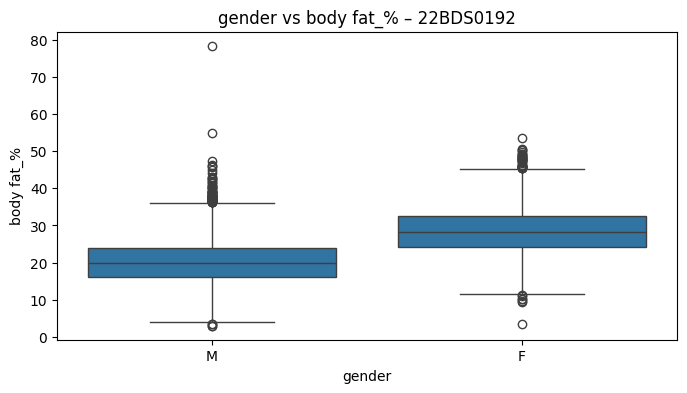

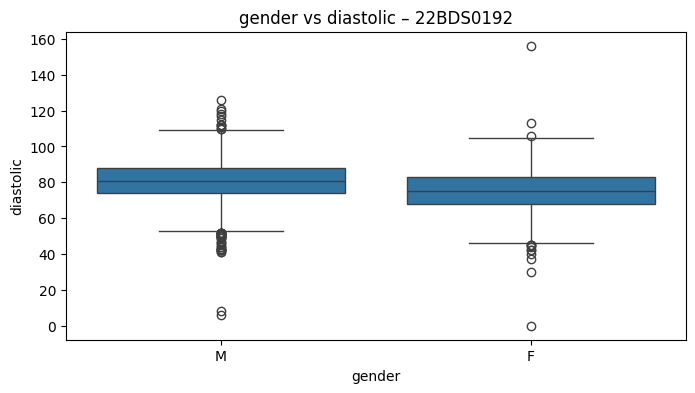

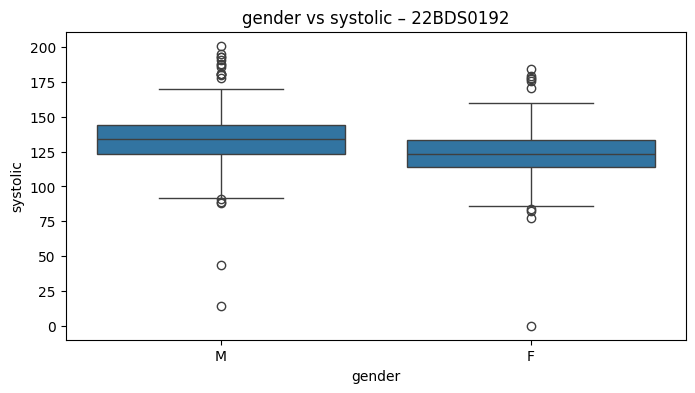

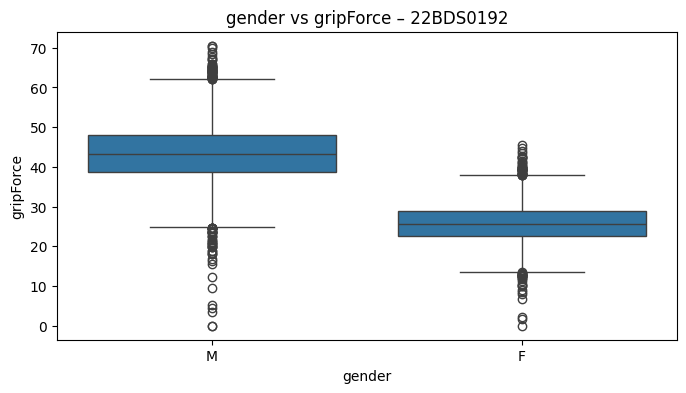

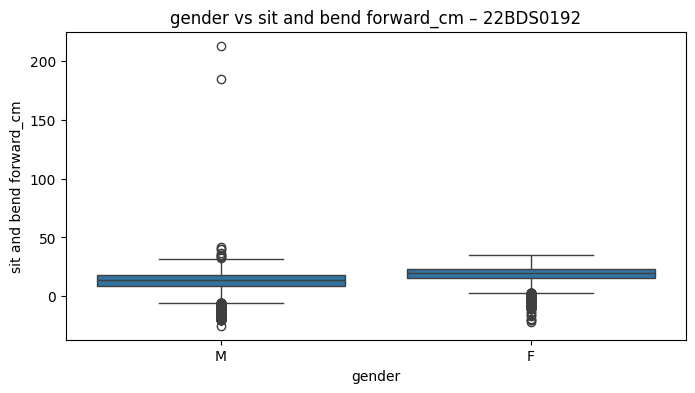

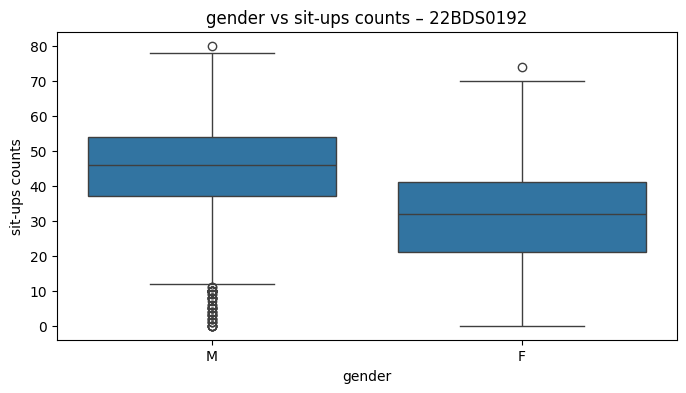

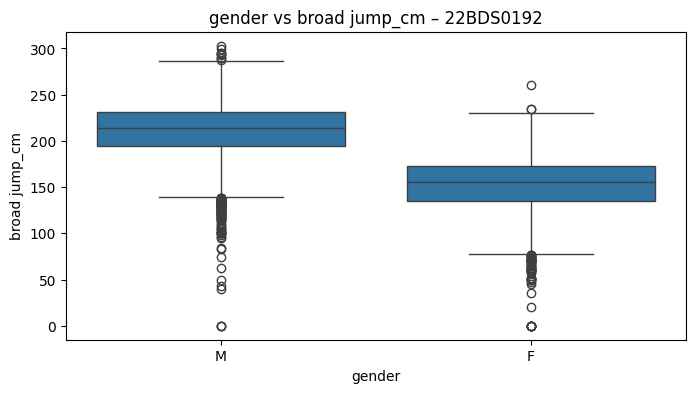

In [7]:
#Bivariate Analysis
# Pairplot
sns.pairplot(df.select_dtypes(include='number'), diag_kind="kde", corner=True)
plt.suptitle("Bivariate Analysis – Pairplot – 22BDS0192", y=1.02)
plt.show()

# Boxplot
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=cat_cols[0], y=col)
    plt.xlabel(cat_cols[0])
    plt.ylabel(col)
    plt.title(f"{cat_cols[0]} vs {col} – 22BDS0192")
    plt.show()


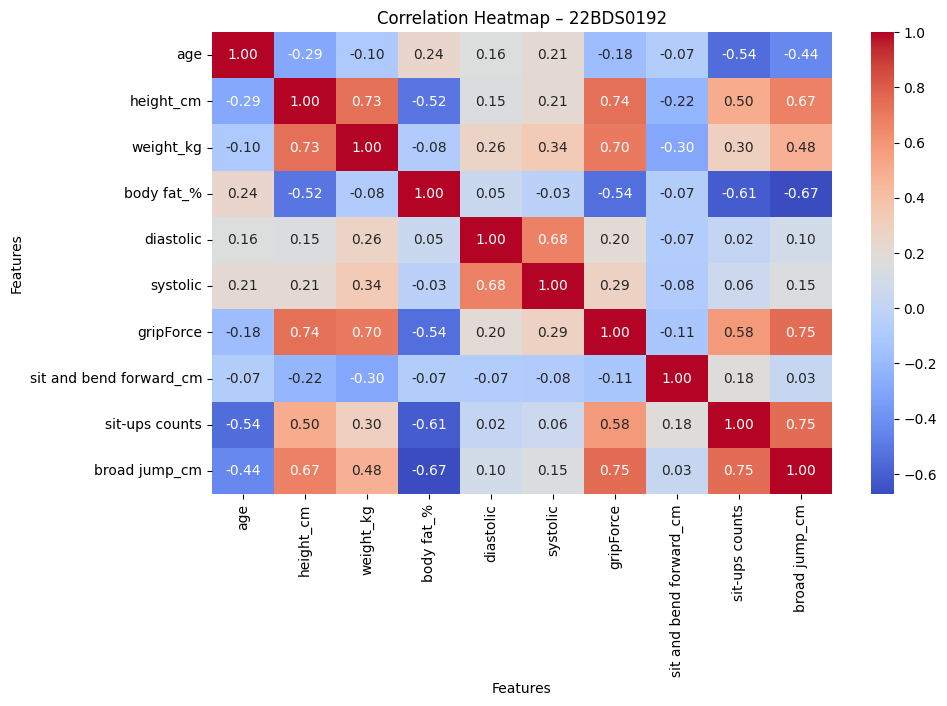

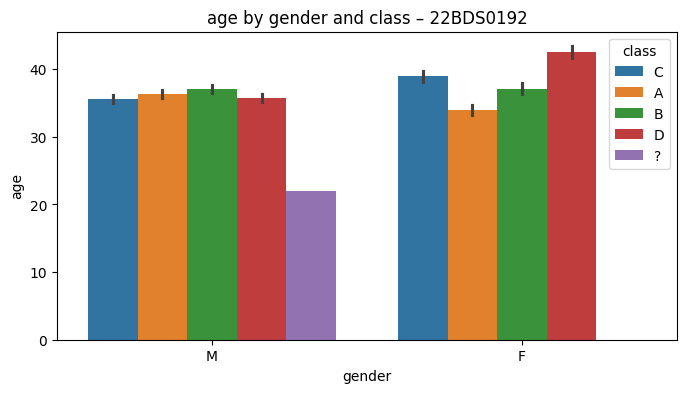

In [8]:
#Mutivariate Analysis
#Heatmap
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap – 22BDS0192")
plt.show()

if len(cat_cols) >= 2:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x=cat_cols[0], y=num_cols[0], hue=cat_cols[1])
    plt.xlabel(cat_cols[0])
    plt.ylabel(num_cols[0])
    plt.title(f"{num_cols[0]} by {cat_cols[0]} and {cat_cols[1]} – 22BDS0192")
    plt.show()
